In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
import datetime
from sklearn.pipeline import Pipeline
#import plotly.express as px

In [78]:
#ford = pd.read_csv('ford.csv')
#bmw = pd.read_csv('bmw.csv')
#audi = pd.read_csv('audi.csv')
#hyundi = pd.read_csv('hyundi.csv')
merc = pd.read_csv('merc.csv')
#skoda = pd.read_csv('skoda.csv')
#toyota = pd.read_csv('toyota.csv')
#vw = pd.read_csv('vw.csv')
#vauxhall = pd.read_csv('vauxhall.csv')
#focus = pd.read_csv('focus.csv')
#cclass = pd.read_csv('cclass.csv')
#unclean_cclass = pd.read_csv('unclean cclass.csv')
#unclean_focus = pd.read_csv('unclean focus.csv')

In [4]:
hyundi.rename(columns={'tax(£)': 'tax'}, inplace=True)

In [5]:
all_cars = [ford, bmw, audi, hyundi, merc, skoda, toyota, vw, vauxhall, focus, cclass]

In [6]:
cars = pd.concat(all_cars)

In [79]:
merc.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0


In [68]:
merc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13119 entries, 0 to 13118
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         13119 non-null  object 
 1   year          13119 non-null  int64  
 2   price         13119 non-null  int64  
 3   transmission  13119 non-null  object 
 4   mileage       13119 non-null  int64  
 5   fuelType      13119 non-null  object 
 6   tax           13119 non-null  int64  
 7   mpg           13119 non-null  float64
 8   engineSize    13119 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 922.6+ KB


C:\Users\lucas.lima\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


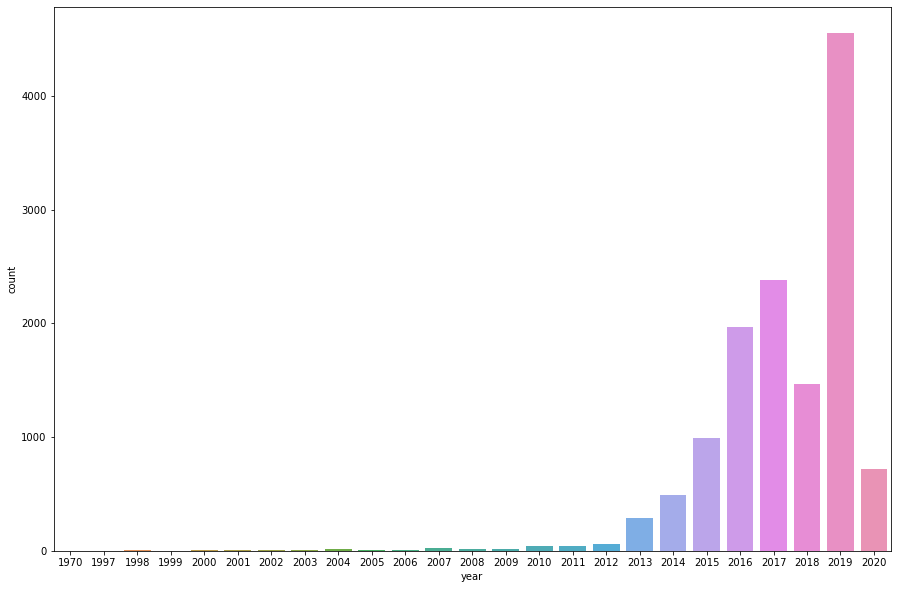

In [69]:
#model_count=cars
#ax2= px.treemap(model_count,path=["model"],title="Number of each model")
##ax2.show()
plt.figure(figsize=(15, 10))
sns.countplot(merc['year'])
plt.show()

In [70]:
merc = merc.groupby('model').count().sort_values('tax', ascending=False)

In [71]:
top_cars = car.index[:10]
top_cars

Index([' Fiesta', ' Golf', ' Focus', ' C Class', ' Corsa', ' Polo', ' Astra',
       ' A Class', ' 3 Series', ' Kuga'],
      dtype='object', name='model')

In [72]:
sucessful = merc[merc['model'].isin(top_cars)]
#sucessful = sucessful.reset_index()

KeyError: 'model'

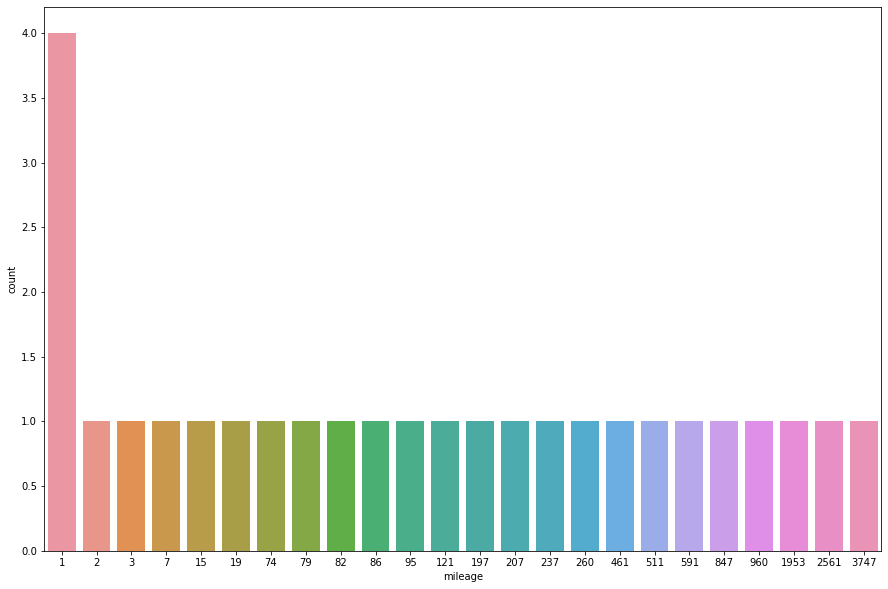

In [74]:
plt.figure(figsize=(15, 10))
sns.countplot(x='mileage', data=merc)
plt.show()

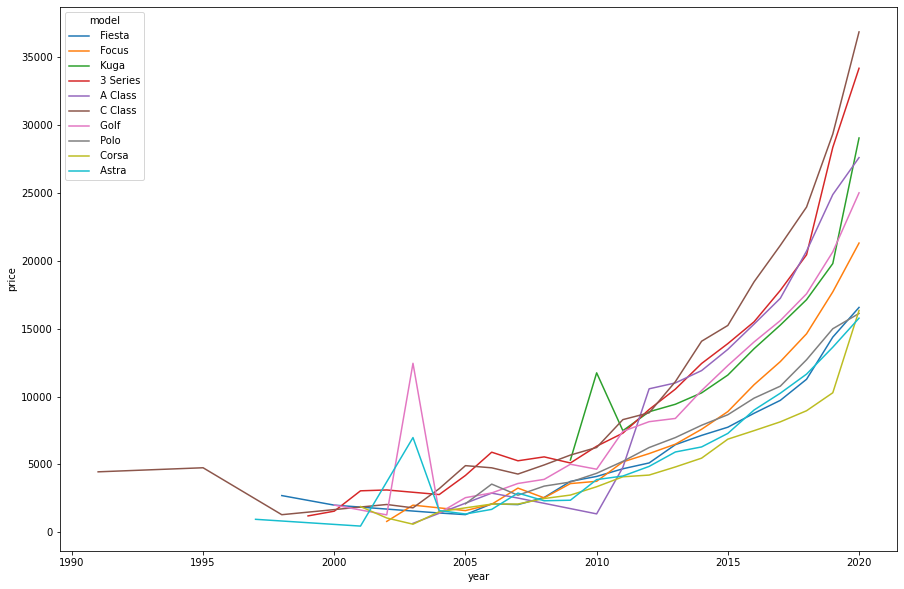

In [37]:
plt.figure(figsize=(15,10))
sns.lineplot(x='year', y='price', hue='model', data=cars[cars['model'].isin(top_cars)], ci=None)
plt.show()

In [75]:
merc.loc[merc['year']==1997]

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
model,,,,,,,,


In [25]:
cars.loc[cars.index == 96392, 'year'] = 2000

In [22]:
cars['year'].min()

1970

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR

In [80]:
df = pd.get_dummies(data=merc, columns=['model','transmission','fuelType'])

In [81]:
y = df['price'].values
x = df.drop('price', axis=1).values

In [86]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.33, random_state = 1)

In [87]:
pipe = Pipeline([('scaler', StandardScaler()), ('LinReg', LinearRegression())])

In [88]:
#linear_regression = LinearRegression()
#linear_regression.fit(x_train,y_train)
#y_pred_lin_reg = linear_regression.predict(x_test)
pipe.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('LinReg', LinearRegression())])

In [89]:
pipe.score(x_train, y_train)

0.7569729291948661